In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


Let's see how this data looks like

In [2]:
suicide = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
suicide.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


A quick first look. There seems to be a lot of null values in HDI column. Let's see how many data available in total and how many of them are missing in each column

In [3]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


'gdp-for-year' is a categorical column instead of int column. We convert this column into int dtype

In [4]:
suicide[' gdp_for_year ($) ']=suicide[' gdp_for_year ($) '].apply(lambda val: val.replace(',', ''))
suicide[' gdp_for_year ($) '] = pd.to_numeric(suicide[' gdp_for_year ($) '])
suicide[' gdp_for_year ($) ']

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name:  gdp_for_year ($) , Length: 27820, dtype: int64

It is a good news that we all data for most of our columns except HDI for year. We may consider dropping it depending on how important it is to predict the result.

There are 6 categorical columns. We may consider about transform these columns into classifications. The same with some numerical columns such as year, suicides_n. 

Let's explore the data more before considering about what we should do with each feature

In [5]:
suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


Let's find out how many countries are in this data

In [6]:
suicide['country'].nunique()

101

A pretty good data with a variety of countries. And those countries are:

In [7]:
suicide['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

There seems to be a lot of repetives in generation. Shall we explore a little bit more about this feature?

In [8]:
suicide['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

This becomes more interesting. I am intrigued to find our more about the difference between generations and how the those difference affects the suicide rates. But before I do that, I should split my data into train and test set so that I am not prone to choose some models and find insights because of the test set.

Use 20% of our data for testing. We choose a random state of 1 so that we have the same test set every time we rerun the code

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(suicide, test_size=0.2, random_state = 1)

Let's see if the function split the data the way we want it to be

In [10]:
test.count()[0]/suicide.count()[0]*100

20.0

the test set is 20% of the orignal data. Perfect

Let's take a look at our train data

In [11]:
train.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,22256.000000,22256.000000,2.225600e+04,22256.000000,6661.000000,2.225600e+04,22256.000000
mean,2001.220345,240.787248,1.833552e+06,12.849233,0.776538,4.399397e+11,16885.264019
std,8.502468,903.808859,3.886196e+06,19.000899,0.093425,1.429547e+12,18913.029228
min,1985.000000,0.000000,2.860000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1994.000000,3.000000,9.702000e+04,0.930000,0.713000,9.008274e+09,3443.000000
50%,2002.000000,25.000000,4.317505e+05,6.000000,0.779000,4.787584e+10,9372.000000
75%,2008.000000,130.000000,1.474497e+06,16.670000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


In [12]:
train.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
3913,Belize,1996,female,25-34 years,0,15534,0.00,Belize1996,NaN,641383800,3545,Generation X
10243,Greece,2003,female,35-54 years,24,1542002,1.56,Greece2003,NaN,201924270316,19202,Boomers
10830,Guatemala,1996,female,25-34 years,7,706026,0.99,Guatemala1996,NaN,15674835615,1775,Generation X
3064,Barbados,2003,male,35-54 years,0,38276,0.00,Barbados2003,NaN,3274850000,12887,Boomers
10938,Guatemala,2005,female,25-34 years,11,960871,1.14,Guatemala2005,0.576,27211377225,2450,Generation X
23518,South Africa,2015,male,15-24 years,90,5190482,1.73,South Africa2015,NaN,317741039198,6403,Millenials
27554,Uruguay,2015,male,5-14 years,3,252509,1.19,Uruguay2015,NaN,53274304222,16696,Generation Z
18356,Panama,1998,female,35-54 years,7,300007,2.33,Panama1998,NaN,11575486400,4488,Boomers
67,Albania,1994,female,25-34 years,4,261100,1.53,Albania1994,NaN,1985673798,697,Boomers
13578,Japan,2002,male,5-14 years,25,6215000,0.40,Japan2002,NaN,4115116279070,34239,Millenials


Observe the distribution of each category in each column to make sure the test set is the representation of the whole population. We don't want to have so many more data of one category compared to the others.

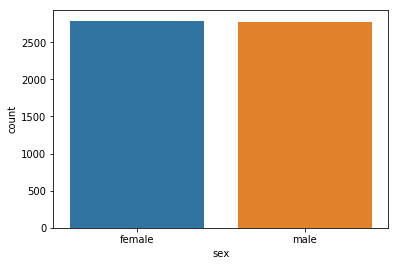

In [13]:
import seaborn as sns
sns.countplot('sex',data=test)

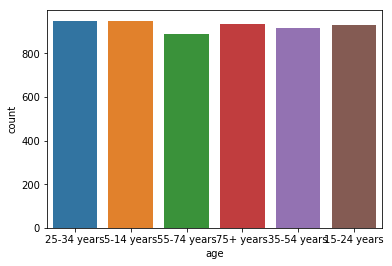

In [14]:
sns.countplot('age',data=test)

Looks like the distribution of sex and age are fairly equal 

The generation is quite important factor if suicide rate. We want to make sure that the generation in the test and the train set is the representation of the whole population

Observe the distribution of each geneneration compared to other generations in test set

In [15]:
test['generation'].value_counts()/len(test)

Generation X       0.233645
Silent             0.228792
Millenials         0.212797
Boomers            0.173976
G.I. Generation    0.094716
Generation Z       0.056075
Name: generation, dtype: float64

In [16]:
suicide['generation'].value_counts()/len(suicide)

Generation X       0.230338
Silent             0.228756
Millenials         0.210065
Boomers            0.179367
G.I. Generation    0.098634
Generation Z       0.052840
Name: generation, dtype: float64

The test set is quite a good representation of the test set. But could we make it better?

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 1)
for train_index, test_index in split.split(suicide, suicide['generation']):
    strat_train = suicide.loc[train_index]
    strat_test = suicide.loc[test_index]

Check our stratified test set

In [18]:
strat_test['generation'].value_counts()/len(strat_test)

Generation X       0.230230
Silent             0.228792
Millenials         0.210101
Boomers            0.179367
G.I. Generation    0.098670
Generation Z       0.052840
Name: generation, dtype: float64

Seems like the new strat_test represents the population better compared to the random test set. We put everything into one table to we could see the difference better

In [19]:
#Create a function to compare the proportions of different set
def generation_proportions(test_set):
    return test_set['generation'].value_counts()/len(test_set)
compare_props = pd.DataFrame({
                'Overall': generation_proportions(suicide),
                'Random': generation_proportions(test),
                'Stratified': generation_proportions(strat_test)}
                            )
compare_props['%err random'] = 100*(compare_props['Random'] - compare_props['Overall'])/ compare_props['Overall']
compare_props['%err stratified'] = 100*(compare_props['Stratified'] - compare_props['Overall'])/ compare_props['Overall']

In [20]:
compare_props

,Overall,Random,Stratified,%err random,%err stratified
Generation X,0.230338,0.233645,0.230230,1.435705,-0.046816
Silent,0.228756,0.228792,0.228792,0.015713,0.015713
Millenials,0.210065,0.212797,0.210101,1.300479,0.017112
Boomers,0.179367,0.173976,0.179367,-3.006012,0.000000
G.I. Generation,0.098634,0.094716,0.098670,-3.972303,0.036443
Generation Z,0.052840,0.056075,0.052840,6.122449,0.000000


Our stratified test set represents the population significanly better. 

Now it is time for us to explore the train data. Make a copy of the training set so that we do not harm the training set

In [21]:
suicide = strat_train.copy()

Observe the correlation between different features with the rates of suicide

In [22]:
corr_mat = suicide.corr()['suicides/100k pop'].sort_values(ascending=False)
corr_mat

suicides/100k pop     1.000000
suicides_no           0.311136
HDI for year          0.071723
 gdp_for_year ($)     0.026898
population            0.012075
gdp_per_capita ($)    0.002982
year                 -0.043047
Name: suicides/100k pop, dtype: float64

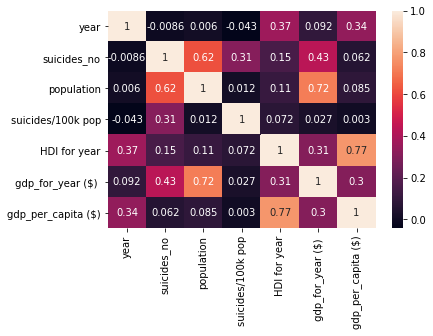

In [23]:
sns.heatmap(suicide.corr(),annot=True)

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


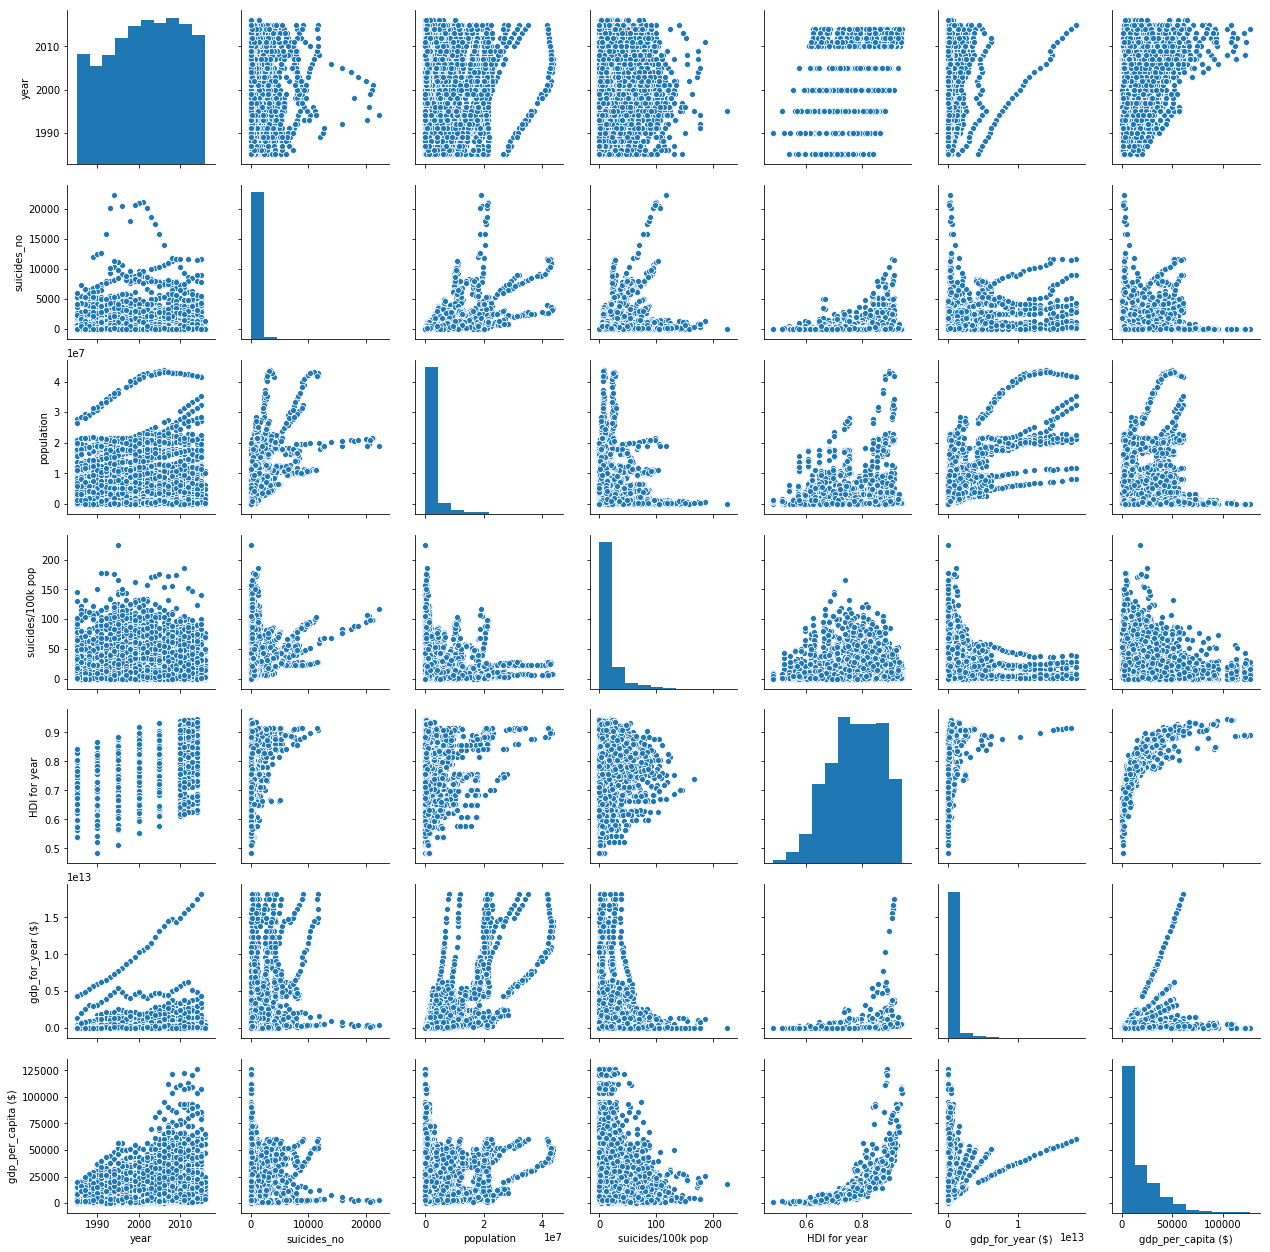

In [24]:
sns.pairplot(suicide)

There seems to be no strong correlation between other features and suicide rates. 

In [25]:
suicide.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
23140,Slovenia,2003,female,15-24 years,9,135063,6.66,Slovenia2003,NaN,29697448108,15568,Millenials
8927,Finland,2002,female,15-24 years,23,319060,7.21,Finland2002,NaN,139552983249,28390,Millenials
16923,Mexico,2014,female,75+ years,8,1862263,0.43,Mexico2014,0.756,1314385330073,11663,Silent
22917,Slovakia,2004,male,55-74 years,119,388244,30.65,Slovakia2004,NaN,57240535138,11177,Silent
23480,South Africa,2012,male,75+ years,8,271907,2.94,South Africa2012,0.659,396332702639,8347,Silent
7866,Ecuador,1999,male,35-54 years,105,1202249,8.73,Ecuador1999,NaN,19645272636,1805,Boomers
11318,Guyana,2010,male,25-34 years,30,53501,56.07,Guyana2010,0.624,2273225042,3384,Generation X
1217,Armenia,2013,male,35-54 years,13,370440,3.51,Armenia2013,0.731,11121465767,3957,Generation X
9789,Germany,1996,female,35-54 years,937,10969800,8.54,Germany1996,NaN,2503665193657,32147,Boomers
15727,Maldives,2003,female,35-54 years,1,25331,3.95,Maldives2003,NaN,1052121055,3867,Boomers


(0, 5.5)

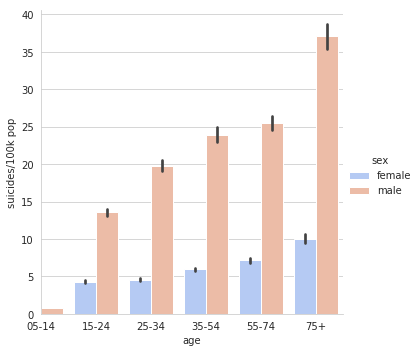

In [26]:
import matplotlib.pyplot as plt
suicide['age'].replace({'5-14 years':'05-14','15-24 years':'15-24','25-34 years':'25-34','35-54 years':'35-54','55-74 years':'55-74','75+ years':'75+'},inplace=True)
sns.set_style('whitegrid')
sns.catplot('age','suicides/100k pop',kind='bar',data=suicide.sort_values(by='age'), hue ='sex',palette='coolwarm')
plt.xlim(0,5.5)

Look like there are much more male committing suicide in each age range than female. And the gap gets bigger as the age range increase 

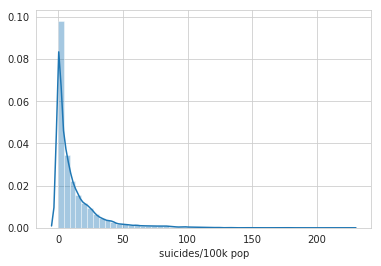

In [27]:
sns.distplot(suicide['suicides/100k pop'])

Top 10 countries with highest suicide rate

In [28]:
countries = suicide.groupby('country').mean().sort_values(by='suicides/100k pop',ascending=False)['suicides/100k pop']
countries.head(10)

country
Lithuania             41.603780
Sri Lanka             35.169327
Russian Federation    34.586074
Belarus               31.988832
Hungary               31.314728
Kazakhstan            29.085315
Slovenia              28.215381
Latvia                28.079143
Ukraine               27.052664
Republic of Korea     26.422333
Name: suicides/100k pop, dtype: float64

Use geopandas to visualize the distribution of suicide rates on the world map

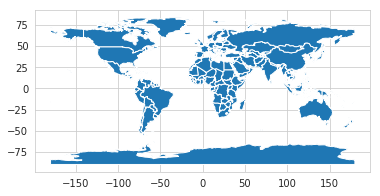

In [29]:
import geopandas as gpd
import geoplot as gplt
#Create a variable holding the map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [30]:
#Merge the map data and our suicide data
merge = world.set_index('name').join(countries,how='inner')
merge.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,suicides/100k pop
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",4.907037
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",12.739712
Kazakhstan,18556698,Asia,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",29.085315
Uzbekistan,29748859,Asia,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",8.254537
Argentina,44293293,South America,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",10.294161


In [31]:
merge.describe()

,pop_est,gdp_md_est,suicides/100k pop
count,7.800000e+01,7.800000e+01,78.000000
mean,2.222655e+07,5.766683e+05,12.926407
std,3.550293e+07,9.394083e+05,9.348902
min,3.299880e+05,3.088000e+03,0.556689
25%,3.139139e+06,6.022250e+04,5.603395
50%,7.022624e+06,1.923500e+05,11.020602
75%,2.218953e+07,5.059750e+05,19.644010
max,2.073534e+08,4.932000e+06,41.603780


It seems like we can just get access to 78 countries out of 101 countries from our map data. But good enough for us to visualize

Compare the suicide rate and population

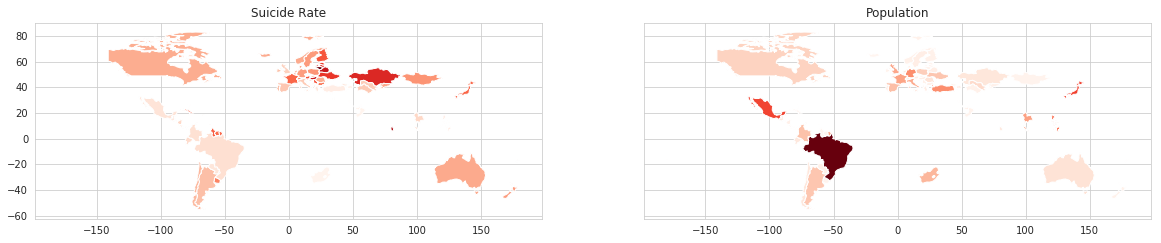

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(20,20))
ax1.set_title('Suicide Rate')
ax2.set_title('Population')
merge.plot(column='suicides/100k pop',cmap='Reds',ax=ax1)
merge.plot(column='pop_est',cmap='Reds',ax=ax2)

The countries with less population tend to be the countries with higher suicide rate. 

In [33]:
merge[['suicides/100k pop','pop_est']].corr()

,suicides/100k pop,pop_est
suicides/100k pop,1.000000,-0.137503
pop_est,-0.137503,1.000000


Although the correlation is not really strong, the negative sign valididates our observation. This correlation cannot indicate anything since the rate of suicide is collected from different years and the population of each country varies every year.

Look at the distribution of the year 

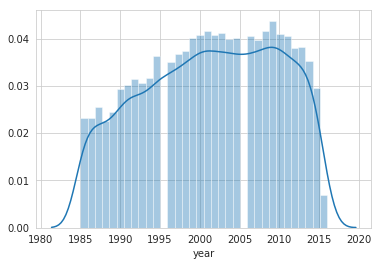

In [34]:
sns.distplot(suicide['year'])

There is an increase in suicide rates from 1985 to 2000. This can be due to increase in stress as technology develops or due to the increase in the quality of recording data

Now it is time to prepare the data for machine learning algorithms.

In [35]:
#Seperate the feature we wants to predict from the training data
#Drop suicides_no and suicides/100k pop they are dependent variables. We could easily predict the rate of suicides by using suicides_no and population.  
suicide = strat_train.drop(['suicides_no','country-year'],axis=1)
suicide_labels = strat_train['suicides/100k pop']

Next step is to clean our data.
Let's take a look at our data again

In [36]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22256 entries, 23140 to 7564
Data columns (total 10 columns):
country               22256 non-null object
year                  22256 non-null int64
sex                   22256 non-null object
age                   22256 non-null object
population            22256 non-null int64
suicides/100k pop     22256 non-null float64
HDI for year          6647 non-null float64
 gdp_for_year ($)     22256 non-null int64
gdp_per_capita ($)    22256 non-null int64
generation            22256 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 1.9+ MB


From the information of the data, we identify two first things we could do to prepare the data for training:
1. Convert categorical data into numerical data
2. Fill in the missing data

Let's start with task 1. 

We will use LabelEncoder to transform text categories to integer categories.

In [37]:
from sklearn.preprocessing import LabelEncoder

cat_attribs = suicide[[column for column in suicide.columns if suicide[column].dtype == 'object']]

le = LabelEncoder()

suicide_cat = cat_attribs.apply(lambda col: le.fit_transform(col))

suicide_cat.head(10)


,country,sex,age,generation
23140,84,0,0,4
8927,32,0,0,4
16923,58,0,5,5
22917,83,1,4,5
23480,85,1,5,5
7866,28,1,2,0
11318,39,1,1,2
1217,3,1,2,2
9789,35,0,2,0
15727,55,0,2,0


ML algorithm will consider the closer integer to have more simlarity, which is not the case here. The second option is to use one hot encoder to change our categorical columns into vectors of values 0 and 1

In [38]:
suicide_cat_dummies = pd.get_dummies(suicide, columns=cat_attribs.columns, drop_first=True )
suicide_cat_dummies

,year,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
23140,2003,135063,6.66,NaN,29697448108,15568,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8927,2002,319060,7.21,NaN,139552983249,28390,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16923,2014,1862263,0.43,0.756,1314385330073,11663,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
22917,2004,388244,30.65,NaN,57240535138,11177,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23480,2012,271907,2.94,0.659,396332702639,8347,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13607,2005,8984855,31.85,0.874,4755410630912,39412,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5841,2002,4104822,14.37,NaN,97933391976,2613,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1894,1994,145328,119.73,NaN,203535242742,27274,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
10419,1989,4485,22.30,NaN,267327630,3268,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


Since this method would signicantly increase the dimension of our data, this could lead to over-fitting. We decide to preprocess the category data with LabelEncoder

In [39]:
1 - suicide['HDI for year'].count()/len(suicide)

0.7013389647735442

There is 70% missing data in column 'HDI for year'. We could not use missing data for training model. We can either drop that feature entirely or fill in the misising data. Since this feature is important for training the model, we choose to fill in the missing data. 

To decide which value to fill in, first observe the distribution of 'HDI for year'

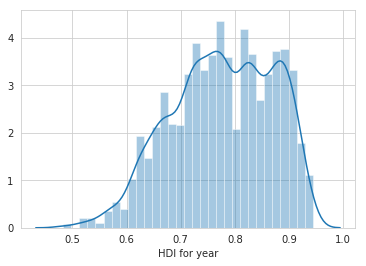

In [40]:
sns.distplot(suicide['HDI for year'].dropna())

In [41]:
suicide.describe()['HDI for year']

count    6647.000000
mean        0.776810
std         0.093072
min         0.483000
25%         0.713000
50%         0.780000
75%         0.855000
max         0.944000
Name: HDI for year, dtype: float64

Since the mean and the median is quite similar, we feel safe to use median as value to fill in

In [42]:
median = suicide['HDI for year'].median()
filled_HDI = suicide['HDI for year'].fillna(median)
filled_HDI.describe()

count    22256.000000
mean         0.779047
std          0.050882
min          0.483000
25%          0.780000
50%          0.780000
75%          0.780000
max          0.944000
Name: HDI for year, dtype: float64

Our filled HDI has roughly the same mean, min, and max as our original column. We want to preserve as much as we can the information of the original data. This result is what we want.

Now look at the distribution of HDI again with the values filled in

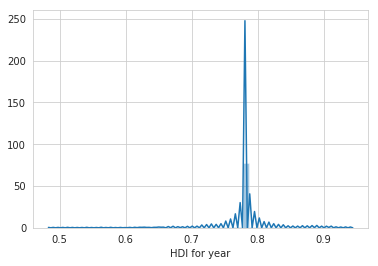

In [43]:
sns.distplot(filled_HDI)

Since about 70% of our data is filled with the median, it makes sense that the majority of our data centers in the median value. 

Take care of our missing values using Imputer to see if we obtain the same result. Imputer becomes handy if we want to fill in missing values in different columns at once

In [44]:
from sklearn.preprocessing import Imputer
 
imputer = Imputer(strategy='median')

num_attribs = suicide[suicide.columns[suicide.dtypes != 'object']]

#Since imputer just applies to numerical columns, we drop categorical columns
suicide_num = imputer.fit_transform(num_attribs)
suicide_num = pd.DataFrame(suicide_num,columns=suicide.columns[suicide.dtypes != 'object'])
suicide_num['HDI for year'].describe()



/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


count    22256.000000
mean         0.779047
std          0.050882
min          0.483000
25%          0.780000
50%          0.780000
75%          0.780000
max          0.944000
Name: HDI for year, dtype: float64

We got the same result for HDI column as we did earlier

Since ML algorithms do not do well with different scales between different features. We use Standard Scaler to standardize our values

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_suicide_num = scaler.fit_transform(suicide_num)

scaled_suicide_num = pd.DataFrame(scaled_suicide_num,columns=suicide.columns[suicide.dtypes != 'object'])

scaled_suicide_num

,year,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,0.203278,-0.434986,-0.325240,0.018727,-0.286462,-0.070265
1,0.085138,-0.388409,-0.296095,0.018727,-0.211551,0.610777
2,1.502811,0.002235,-0.655377,-0.452965,0.589576,-0.277679
3,0.321417,-0.370896,0.946024,0.018727,-0.267680,-0.303493
4,1.266532,-0.400346,-0.522368,-2.359385,-0.036451,-0.453809
...,...,...,...,...,...,...
22251,0.439556,1.805236,1.009614,1.866185,2.936038,1.196211
22252,0.085138,0.569913,0.083324,0.018727,-0.239932,-0.758370
22253,-0.859977,-0.432388,5.666500,0.018727,-0.167921,0.551500
22254,-1.450673,-0.468040,0.503546,0.018727,-0.306531,-0.723580


As we see from the dataframe, every of our numerical is standardized. This would help the ML algorithms run more efficiently.

So far we have:
1. Preprocess numerical data with Imputer, StandardScaler. 
2. Preprocess categorical data with LabelEncoder

We could combine steps in step 1 and 2 in 2 pipelines. Then combine those pipeline using ColumnTransformer

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False))
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False))
])

full_pipeline = ColumnTransformer([
    ('num_pipeline', num_pipeline, list(num_attribs.columns)),
    ('cat_pipeline', cat_pipeline, list(cat_attribs.columns)),
])



/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [47]:
suicide_prepared = full_pipeline.fit_transform(suicide)
type(suicide_prepared)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


scipy.sparse.csr.csr_matrix

Now it is time for selecting and training model

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(suicide_prepared,suicide_labels)
lr_predictions = lr.predict(suicide_prepared)
lr_predictions




array([  6.65999964,   7.2099995 ,   0.43000018, ..., 119.73000102,
        22.30000056,  20.57000027])

In [49]:
#Find the mean difference between the predictions and the real values 
(lr_predictions-list(suicide_labels)).mean()

5.96077984350141e-14

Use Mean Absolute Error for more accurate evaluation

In [50]:
from sklearn.metrics import mean_squared_error

lrmse = np.sqrt(mean_squared_error(suicide_labels,lr_predictions))
lrmse

4.0792305491720775e-07

Try DecisionTreeRegressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor(random_state=0)
dr.fit(suicide_prepared,suicide_labels)
dr_predictions = dr.predict(suicide_prepared)

drmse = np.sqrt(mean_squared_error(suicide_labels,dr_predictions))
drmse

6.954770814064992e-16

We get really good results with both linear regressor and decision tree regressor using mean squared error. Decision tree regressor seems to be a better choice than linear regression. But this is not an accurate evaluation since we use one data to train and evaluate. We could instead use Cross-Validation.

In [52]:
from sklearn.model_selection import cross_val_score

scores_1 = cross_val_score(dr, suicide_prepared, suicide_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_scores = np.sqrt(-scores_1)
tree_scores.mean()

0.22992238535113413

In [53]:
scores_2 = cross_val_score(lr, suicide_prepared, suicide_labels, scoring = "neg_mean_squared_error", cv = 10)
lr_scores = np.sqrt(-scores_2)
lr_scores.mean()

6.71998640994329e-07

Now we have a better evaluation of our model. Now linear regression has about the same error score as the previous evaluation method while decision tree has much worse performance. This shows that the Decision Tree model is overfitting really badly.

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(suicide_prepared, suicide_labels)

scores_3 = cross_val_score(forest_reg, suicide_prepared, suicide_labels, scoring = "neg_mean_squared_error", cv = 10)
rf_scores = np.sqrt(-scores_3)
rf_scores.mean()

0.20375999068739153

RandomForestRegressor performs well but not as good as LinearRegression. This indicates that the random forest regressor is also overfitting. We could choose the right hyperparameter to prevent overfitting. This can be done using GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]},
    
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4, 6,8 ]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True,
                          error_score=np.nan)
grid_search.fit(suicide_prepared, suicide_labels) 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
              

In [56]:
grid_search.best_params_

{'max_features': 10, 'n_estimators': 30}

In [57]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [58]:
cvres = grid_search.cv_results_

In [59]:
cvres_df = pd.DataFrame(cvres)
cvres_df["mean_score"] = cvres_df['mean_test_score'].apply(lambda x:np.sqrt(-x) )
cvres_df[["mean_score","params"]].sort_values(by='mean_score')

,mean_score,params
14,2.755062,"{'max_features': 10, 'n_estimators': 30}"
11,2.968787,"{'max_features': 8, 'n_estimators': 30}"
8,3.218544,"{'max_features': 6, 'n_estimators': 30}"
13,3.306365,"{'max_features': 10, 'n_estimators': 10}"
24,3.406850,"{'bootstrap': False, 'max_features': 8, 'n_est..."
10,3.622893,"{'max_features': 8, 'n_estimators': 10}"
5,3.697358,"{'max_features': 4, 'n_estimators': 30}"
22,3.746957,"{'bootstrap': False, 'max_features': 6, 'n_est..."
20,3.925207,"{'bootstrap': False, 'max_features': 4, 'n_est..."
7,4.001263,"{'max_features': 6, 'n_estimators': 10}"


In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(suicide_prepared, suicide_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [61]:
rnd_search.best_params_
rnd_results = rnd_search.cv_results_
rnd_results = pd.DataFrame(rnd_results)
rnd_results['mean_score'] = rnd_results['mean_test_score'].apply(lambda x: np.sqrt(-x))
rnd_results[["mean_score","params"]].sort_values(by='mean_score')

,mean_score,params
1,2.857720,"{'max_features': 8, 'n_estimators': 189}"
6,2.874341,"{'max_features': 8, 'n_estimators': 131}"
4,2.874598,"{'max_features': 8, 'n_estimators': 117}"
0,3.003811,"{'max_features': 7, 'n_estimators': 180}"
9,3.126278,"{'max_features': 6, 'n_estimators': 130}"
7,3.267499,"{'max_features': 6, 'n_estimators': 53}"
2,3.410786,"{'max_features': 5, 'n_estimators': 103}"
5,3.607501,"{'max_features': 4, 'n_estimators': 104}"
3,3.671095,"{'max_features': 3, 'n_estimators': 75}"
8,3.907784,"{'max_features': 2, 'n_estimators': 88}"
